In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from copy import deepcopy as copy 

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','Output']
data = pd.read_csv(url,names = names)
data.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

In [ ]:
data.describe()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data = data.dropna(how='any') 
data

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.rename(columns={'Output': 'Income'}, inplace=True)
data.head(0)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income


In [ ]:
data = data[(data.workclass != ' ?' ) & (data.education != ' ?') & (data.maritalStatus != ' ?' ) & (data.occupation != ' ?') & (data.relationship != ' ?') & (data.race != ' ?') & (data.sex != ' ?') & (data.nativeCountry != ' ?')]
data

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
data['Income'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 30162, dtype: object>

In [ ]:
from sklearn import preprocessing

pre_p = preprocessing.LabelEncoder()

In [ ]:
data['workclass'] = pre_p.fit_transform(data['workclass'])
data['education'] = pre_p.fit_transform(data['education'])
data['maritalStatus'] = pre_p.fit_transform(data['maritalStatus'])
data['occupation'] = pre_p.fit_transform(data['occupation'])
data['relationship'] = pre_p.fit_transform(data['relationship'])
data['race'] = pre_p.fit_transform(data['race'])
data['sex'] = pre_p.fit_transform(data['sex'])
data['nativeCountry'] = pre_p.fit_transform(data['nativeCountry'])
data['Income'] = pre_p.fit_transform(data['Income'])

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


Data Visualization:

Update it


In [ ]:
import seaborn as sns

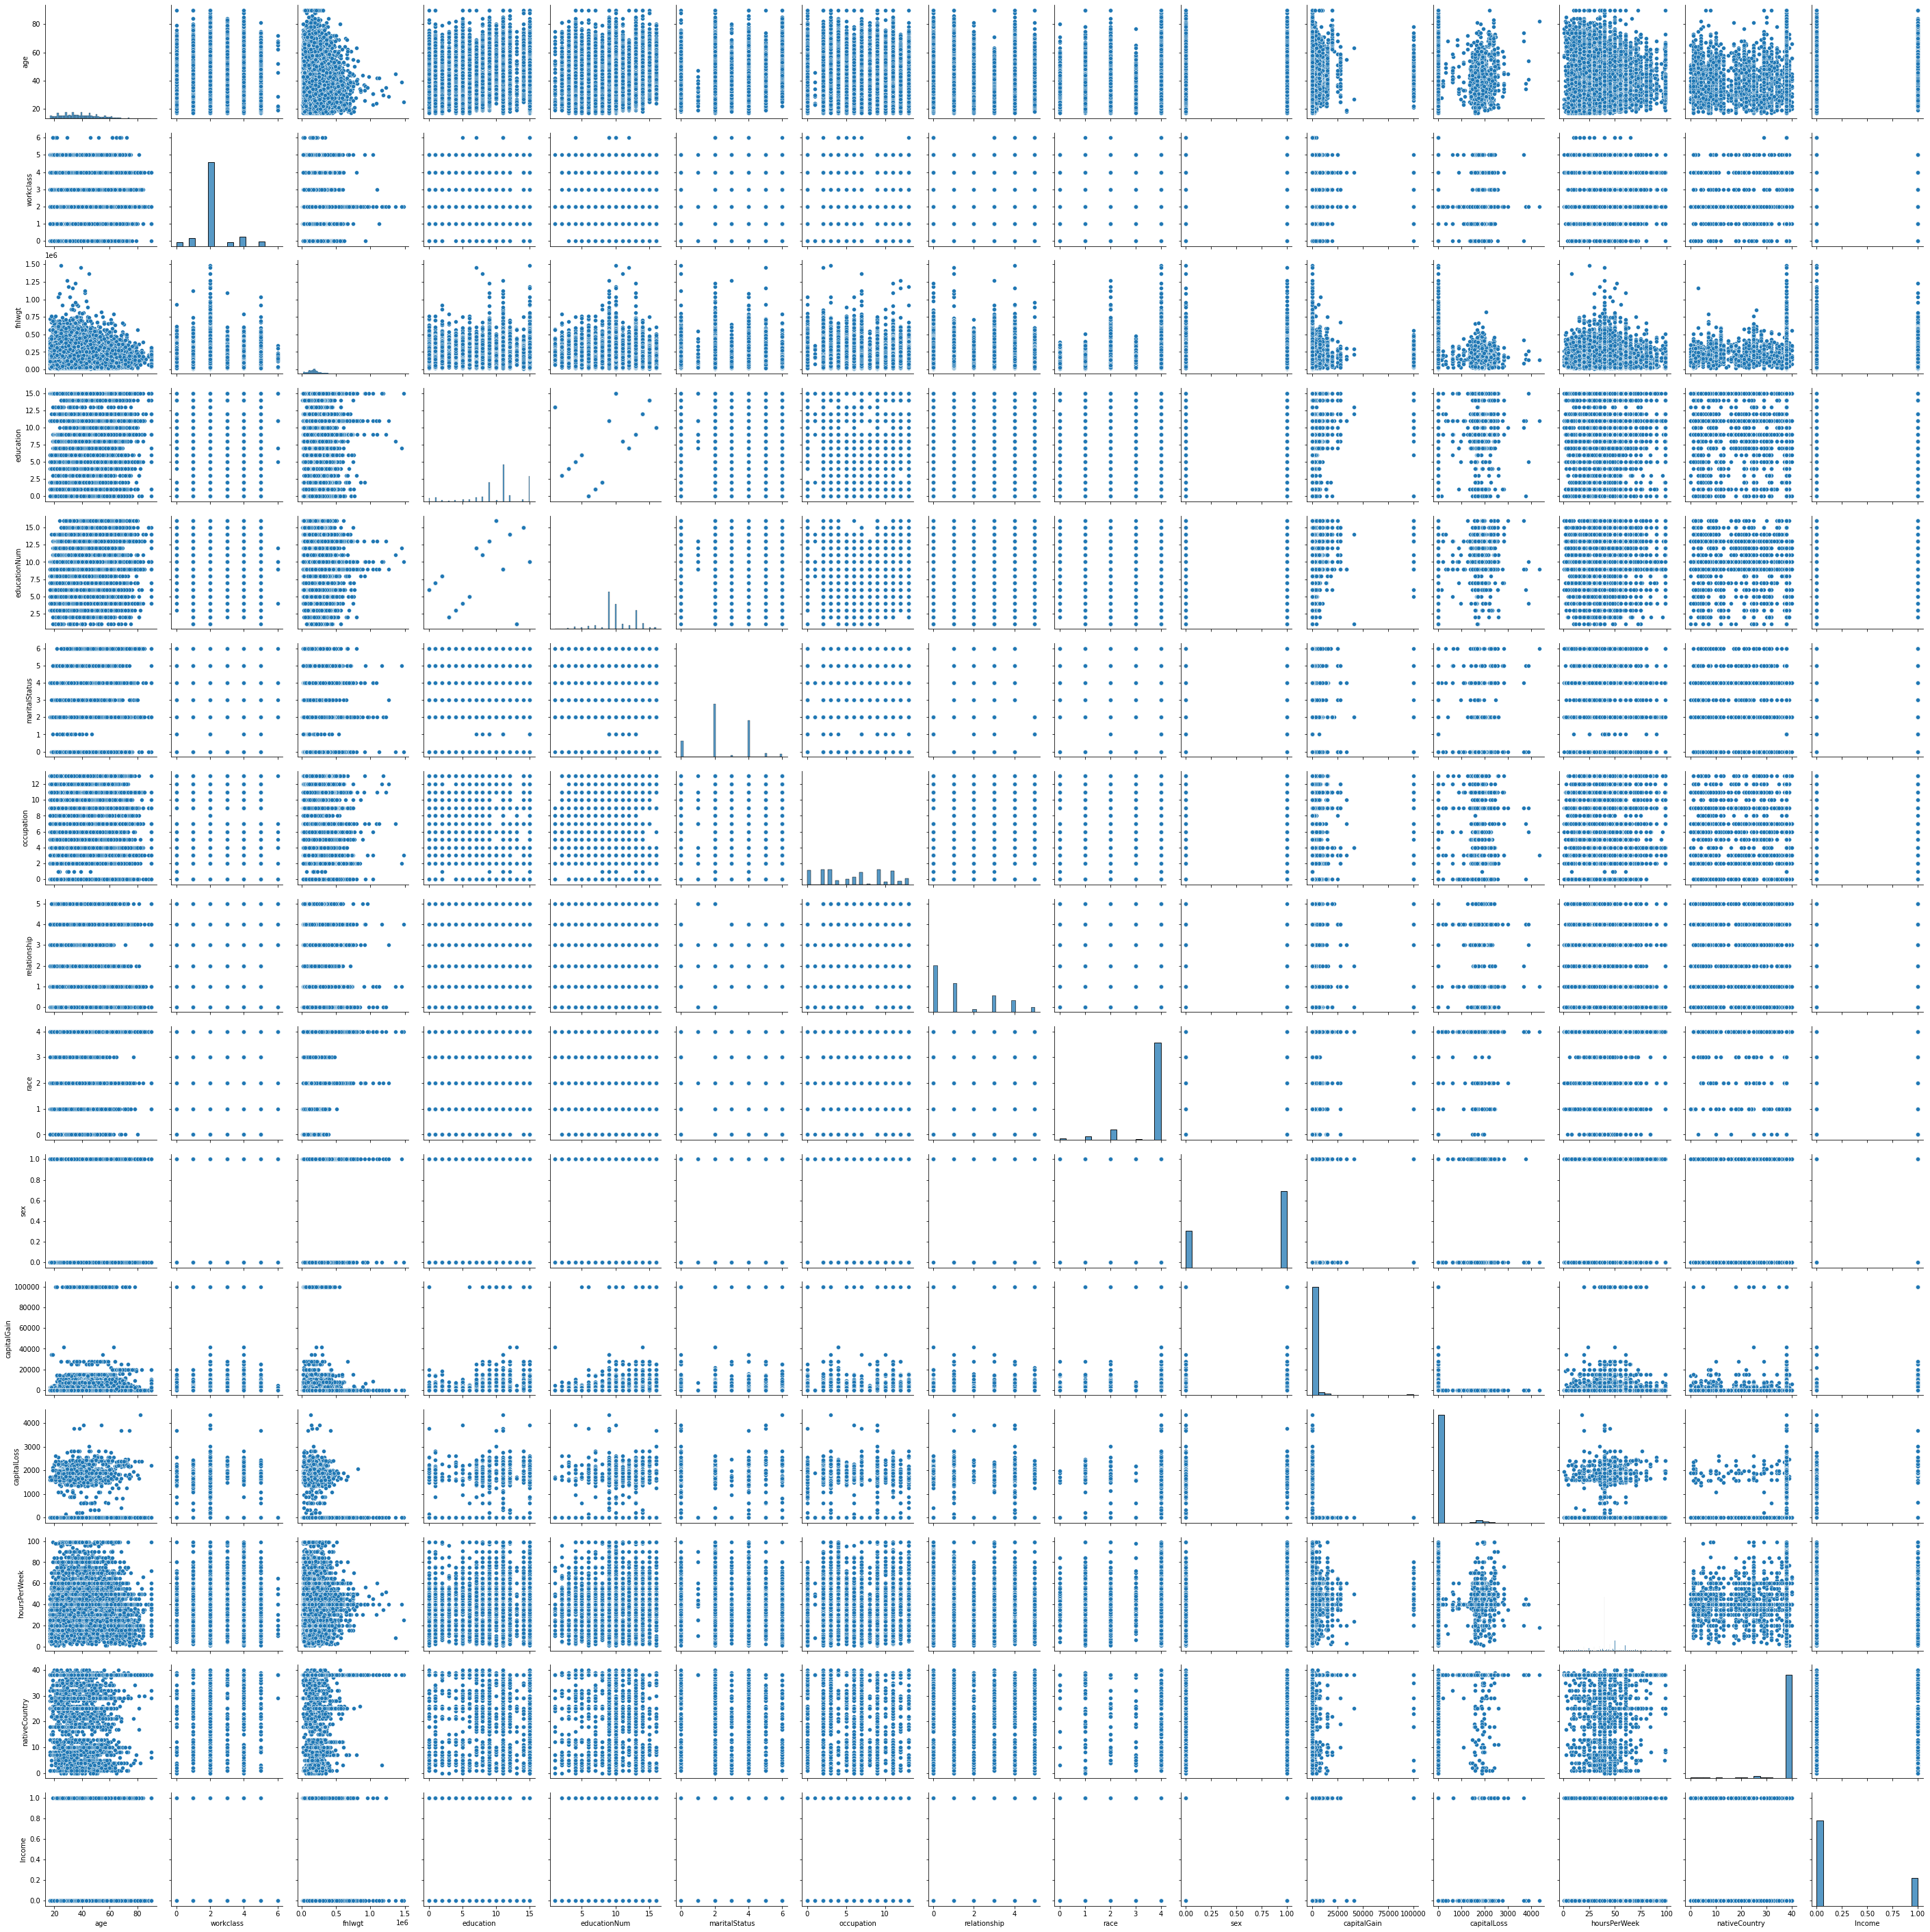

In [ ]:
g = sns.pairplot(data)
g.fig.set_size_inches(40,40)

<Figure size 1440x720 with 0 Axes>

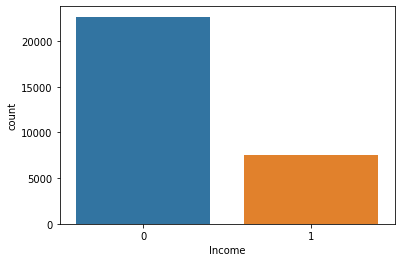

<Figure size 1440x720 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x="Income", data=data)
plt.figure(figsize=(20,10))

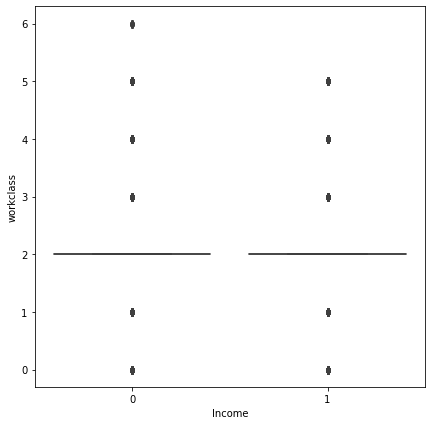

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="workclass",x='Income', data=data)

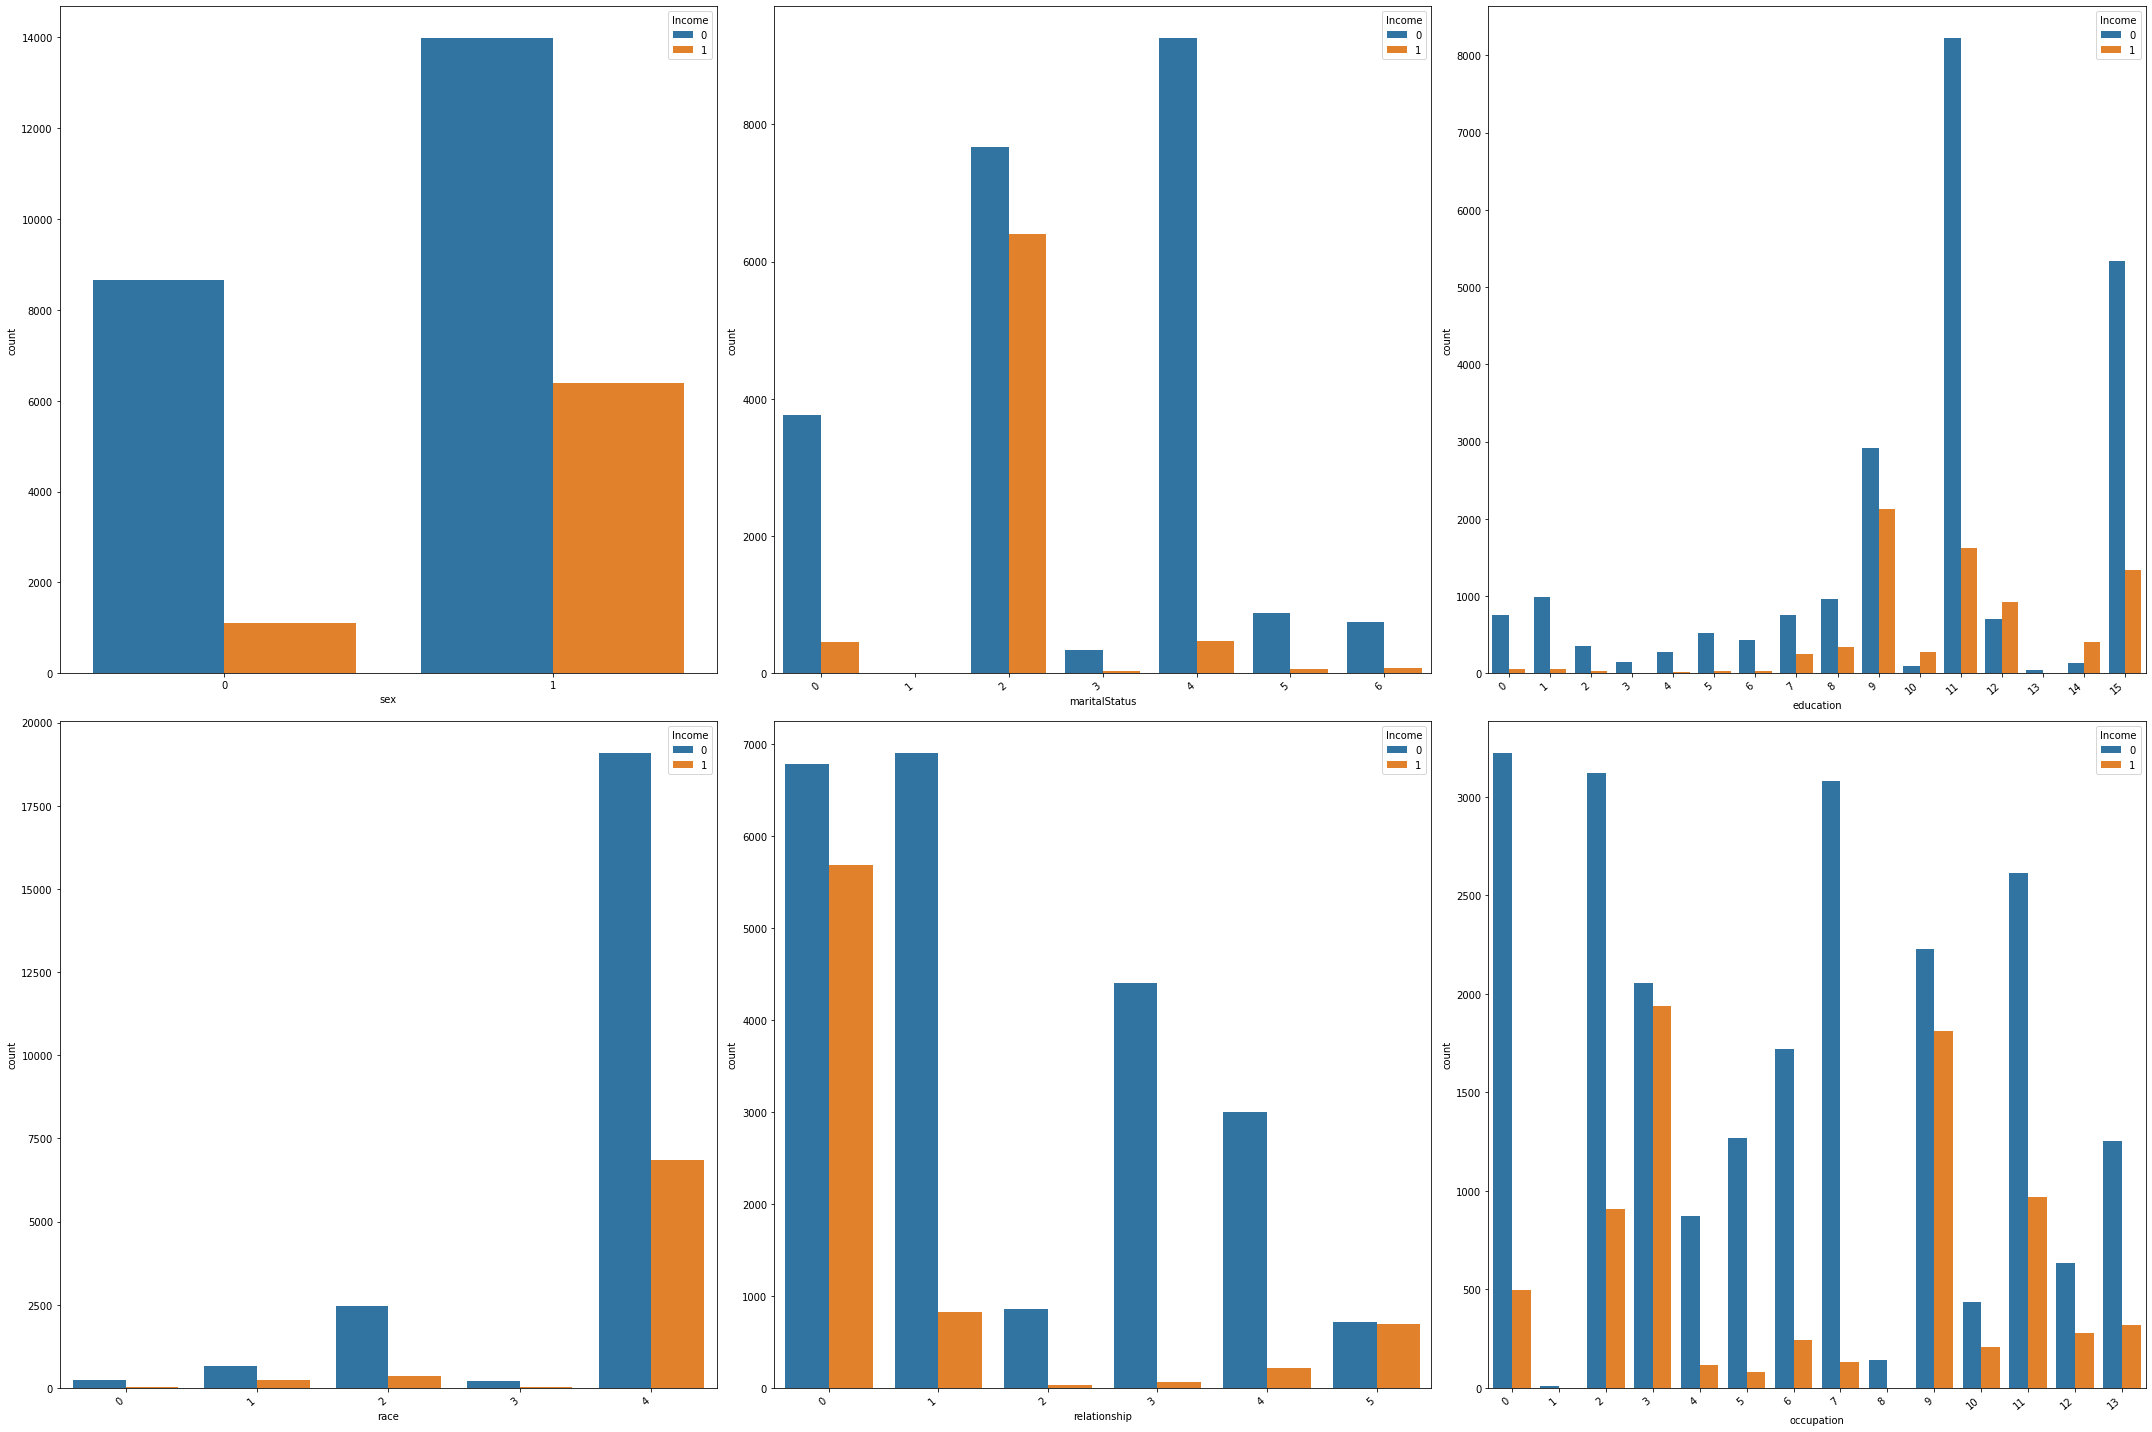

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=data,hue="Income",ax = ax[0][0])
cp = sns.countplot(x="maritalStatus", data=data,hue="Income",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=data,hue="Income",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=data,hue="Income",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=data,hue="Income", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=data,hue="Income",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

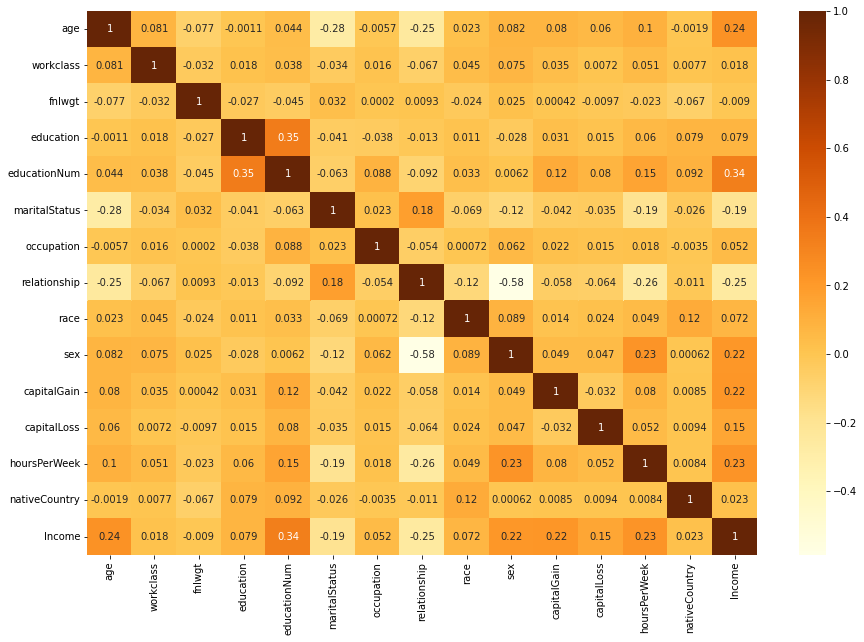

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap = 'YlOrBr')

PCA

In [ ]:
X  = data.drop(columns = ['Income'])
y  = data['Income']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.04279571,  2.93600035, -1.0627216 , ..., -0.21858598,
        -0.07773411,  0.26492394],
       [ 0.88028814,  1.88768202, -1.00787131, ..., -0.21858598,
        -2.3315307 ,  0.26492394],
       [-0.03333996, -0.20895464,  0.24469349, ..., -0.21858598,
        -0.07773411,  0.26492394],
       ...,
       [ 1.48937355, -0.20895464, -0.3585745 , ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.25151078, -0.20895464,  0.11070545, ..., -0.21858598,
        -1.74721307,  0.26492394],
       [ 1.0325595 ,  0.83936369,  0.92884082, ..., -0.21858598,
        -0.07773411,  0.26492394]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.8)

X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(30162, 10)

In [ ]:
X_pca

array([[ 7.87645451e-01, -4.96357041e-01, -4.29100541e-01, ...,
        -6.08400485e-01,  1.00939176e+00, -2.02566601e-01],
       [ 8.22488937e-01, -1.58859246e-01, -1.15225111e+00, ...,
        -2.09553748e-01, -8.17238456e-02, -8.98456386e-01],
       [ 8.79838494e-01,  4.15287600e-01, -5.93734170e-01, ...,
         1.75596222e-01, -7.11245019e-01,  1.46558709e-02],
       ...,
       [-1.97882860e+00, -6.68584222e-01, -1.27670006e+00, ...,
         8.78036126e-04,  9.30255463e-01, -2.62744305e-02],
       [-1.75564659e+00,  1.40846085e-01,  3.92746675e-01, ...,
        -1.90183289e-01,  8.11902693e-01, -3.49662154e-01],
       [-1.15821598e+00, -9.87318500e-01, -1.65713515e+00, ...,
         2.14941718e+00,  3.06056889e-01,  1.27832095e-02]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 20)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lin_class = LogisticRegression()
lin_class.fit(X_train,y_train)
lin_class

LogisticRegression()

In [ ]:
pred_train = lin_class.predict(X_train)
pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_train,pred_train)

0.8151601806954287

In [ ]:
confusion_matrix(y_train,pred_train)

array([[16995,  1084],
       [ 3376,  2674]])

In [ ]:
pred_test = lin_class.predict(X_test)
accuracy_score(pred_test,y_test)

0.8267860102768109

In [ ]:
confusion_matrix(pred_test,y_test)

array([[4343,  813],
       [ 232,  645]])

SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_class = SVC(kernel = 'poly')
svm_class

SVC(kernel='poly')

In [ ]:
svm_class.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
pred_svm_train = svm_class.predict(X_train)
accuracy_score(pred_svm_train,y_train)

0.8162377222429442

In [ ]:
confusion_matrix(pred_svm_train,y_train)

array([[17581,  3936],
       [  498,  2114]])

In [ ]:
pred_svm_test = svm_class.predict(X_test)
accuracy_score(pred_svm_test,y_test)

0.8264545002486325

In [ ]:
confusion_matrix(pred_svm_test,y_test)

array([[4470,  942],
       [ 105,  516]])

In [ ]:
df1 = data.drop(['fnlwgt','education', 'capitalLoss','nativeCountry'],axis=1)
df1

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,Income
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


Refining data

In [ ]:
X = df1.drop(['Income'],axis=1)
Y = df1['Income']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [ ]:
X_train.shape

(21113, 10)

In [ ]:
Y_train.shape

(21113,)

In [ ]:
Y_test= np.array(Y_test).reshape(-1,1)
Y_test.shape

(9049, 1)

In [ ]:
Y_train= np.array(Y_train).reshape(-1,1)
Y_train.shape

(21113, 1)

Network 1

In [ ]:
from keras.layers import InputLayer

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dropout_23 (Dropout)        (None, 10)                0         
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dropout_24 (Dropout)        (None, 10)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_34 (Dense)            (None, 10)               

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
43/43 [==============================] - 1s 3ms/step - loss: 13.8314 - accuracy: 0.4483
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 8.1027 - accuracy: 0.5737
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 4.9443 - accuracy: 0.5901
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 4.2017 - accuracy: 0.6095
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 3.0065 - accuracy: 0.6320
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 2.3161 - accuracy: 0.6620
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 1.9266 - accuracy: 0.7033
Epoch 8/10
43/43 [==============================] - 0s 3ms/step - loss: 1.5480 - accuracy: 0.7234
Epoch 9/10
43/43 [==============================] - 0s 3ms/step - loss: 1.4065 - accuracy: 0.7351
Epoch 10/10
43/43 [==============================] - 0s 3ms/step - loss: 1.3014 - accuracy: 0.7470


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

283/283 [==============================] - 0s 1ms/step


In [ ]:
accuracy_score(Y_test,y_pred)

0.6157586473643496

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[4631, 2168],
       [1309,  941]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred)

0.35118492256017914

Network 2

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dropout_27 (Dropout)        (None, 10)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
43/43 [==============================] - 1s 2ms/step - loss: 12.1842 - accuracy: 0.2709
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 5.7956 - accuracy: 0.4688
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 4.4789 - accuracy: 0.6336
Epoch 4/10
43/43 [==============================] - 0s 2ms/step - loss: 3.8833 - accuracy: 0.6492
Epoch 5/10
43/43 [==============================] - 0s 2ms/step - loss: 3.3182 - accuracy: 0.6764
Epoch 6/10
43/43 [==============================] - 0s 2ms/step - loss: 2.8827 - accuracy: 0.6767
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 2.3090 - accuracy: 0.6788
Epoch 8/10
43/43 [==============================] - 0s 2ms/step - loss: 1.9766 - accuracy: 0.6921
Epoch 9/10
43/43 [==============================] - 0s 2ms/step - loss: 1.8576 - accuracy: 0.6905
Epoch 10/10
43/43 [==============================] - 0s 3ms/step - loss: 1.5778 - accuracy: 0.6993


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

283/283 [==============================] - 0s 1ms/step


In [ ]:
confusion_matrix(Y_test, y_pred)

array([[5133, 1666],
       [1406,  844]])

In [ ]:
accuracy_score(Y_test,y_pred)

0.6605149740302796

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred)

0.3546218487394958